In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [238]:
df=pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [240]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

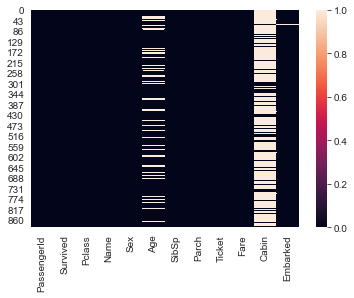

In [241]:
sns.heatmap(df.isnull())

In [242]:
df.drop('Cabin',axis=1,inplace=True)

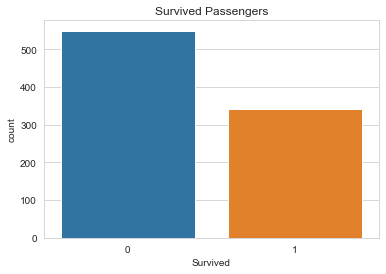

In [243]:
sns.set_style('whitegrid')
plt.title('Survived Passengers')
sns.countplot(x='Survived',data=df)
plt.show()

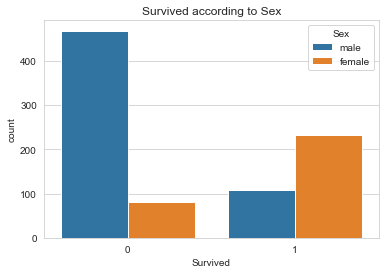

In [244]:
sns.set_style('whitegrid')
plt.title('Survived according to Sex')
sns.countplot(x='Survived',hue='Sex',data=df)
plt.show()

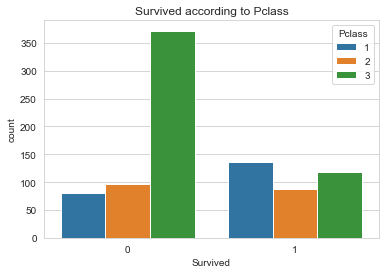

In [245]:
sns.set_style('whitegrid')
plt.title('Survived according to Pclass')
sns.countplot(x='Survived',hue='Pclass',data=df)
plt.show()

<AxesSubplot:>

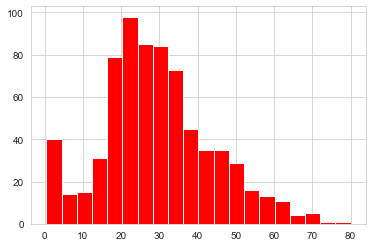

In [246]:
df['Age'].hist(bins=20,color='Red')

<AxesSubplot:>

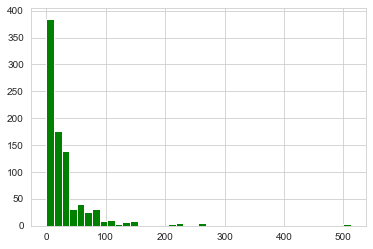

In [247]:
df['Fare'].hist(bins=40,color='Green')

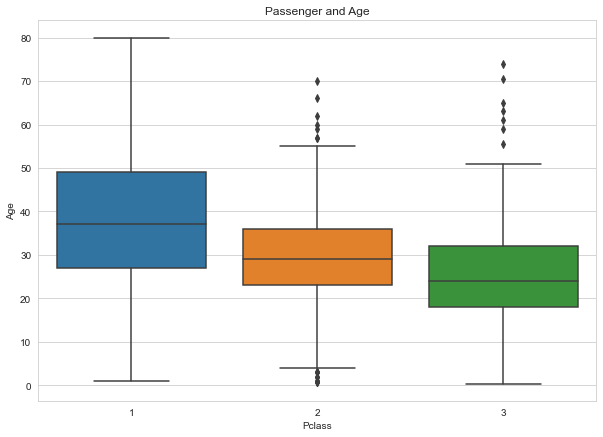

In [248]:
plt.figure(figsize=(10,7))
plt.title('Passenger and Age')
sns.boxplot(x='Pclass',y='Age',data=df)
plt.show()

In [249]:
def new_age(cols):
    age=cols[0]
    pclass=cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else :
            return 25
    else:
        return age 
    

In [250]:
df['Age']=df[['Age','Pclass']].apply(new_age,axis=1)

<AxesSubplot:>

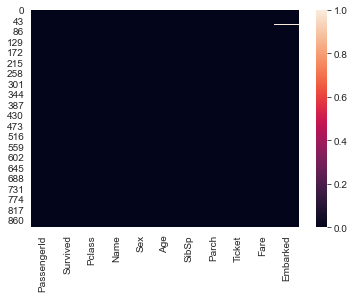

In [251]:
sns.heatmap(df.isnull())

In [252]:
embark=pd.get_dummies(df['Embarked'],drop_first=True)
sex=pd.get_dummies(df['Sex'],drop_first=True)

In [253]:
df.drop(['Sex','Name','Embarked','Ticket'],axis=1,inplace=True)

In [254]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [255]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [256]:
df=pd.concat([df,sex,embark],axis=1)

In [258]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [259]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64

In [260]:
from scipy.stats import zscore

In [261]:
z=np.abs(zscore(df))
z

array([[1.73010796, 0.78927234, 0.82737724, ..., 0.73769513, 0.30756234,
        0.61930636],
       [1.72622007, 1.2669898 , 1.56610693, ..., 1.35557354, 0.30756234,
        1.61470971],
       [1.72233219, 1.2669898 , 0.82737724, ..., 1.35557354, 0.30756234,
        0.61930636],
       ...,
       [1.72233219, 0.78927234, 0.82737724, ..., 1.35557354, 0.30756234,
        0.61930636],
       [1.72622007, 1.2669898 , 1.56610693, ..., 0.73769513, 0.30756234,
        1.61470971],
       [1.73010796, 0.78927234, 0.82737724, ..., 0.73769513, 3.25137334,
        1.61470971]])

In [262]:
threshold=3
print(np.where(z>3))
df=df[(z<3).all(axis=1)]

(array([  5,  13,  16,  16,  22,  25,  27,  28,  32,  44,  46,  47,  50,
        59,  68,  71,  82,  86,  88,  96, 109, 116, 116, 118, 119, 126,
       143, 156, 159, 164, 167, 171, 171, 180, 182, 186, 188, 196, 198,
       201, 208, 214, 233, 241, 245, 258, 260, 261, 264, 266, 274, 278,
       278, 280, 289, 299, 300, 301, 303, 311, 322, 324, 330, 341, 358,
       359, 360, 364, 368, 377, 380, 386, 388, 411, 412, 421, 428, 437,
       438, 438, 459, 468, 480, 493, 501, 502, 510, 517, 525, 527, 541,
       542, 552, 557, 560, 567, 573, 593, 610, 612, 613, 626, 629, 630,
       638, 653, 654, 657, 672, 678, 679, 680, 683, 686, 689, 697, 700,
       703, 716, 718, 727, 730, 736, 737, 742, 745, 749, 767, 768, 774,
       776, 778, 779, 787, 787, 790, 792, 813, 824, 825, 828, 846, 850,
       851, 858, 863, 885, 885, 890], dtype=int64), array([8, 5, 4, 8, 8, 5, 6, 8, 8, 8, 8, 8, 4, 4, 4, 4, 8, 5, 6, 3, 8, 3,
       8, 6, 4, 8, 8, 8, 4, 4, 5, 4, 8, 4, 4, 8, 8, 8, 8, 4, 8, 8, 4, 8,
       8,

In [266]:
x=df.iloc[ :,2:]
x

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
884,3,25.0,0,0,7.0500,1,0,1
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,25.0,1,2,23.4500,0,0,1


In [268]:
y=df.iloc[:, 1:2]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
884,0
886,0
887,1
888,0


In [270]:
from sklearn.model_selection import train_test_split

In [271]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=79)


In [272]:
x_train.shape

(524, 8)

In [273]:
y_train.shape

(524, 1)

In [274]:
x_test.shape

(225, 8)

In [275]:
y_test.shape

(225, 1)

In [280]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lg=LogisticRegression()

In [277]:
lg.fit(x_train,y_train)

LogisticRegression()

In [278]:
lg.score(x_train,y_train)

0.8015267175572519

In [279]:
pred=lg.predict(x_test)
pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0], dtype=int64)

In [281]:
print(accuracy_score(pred,y_test))

0.8


In [282]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB 
gnb=GaussianNB()
gnb.fit(x_train,y_train)


GaussianNB()

In [283]:
predgnb=gnb.predict(x_test)
print(accuracy_score(predgnb,y_test))

0.7911111111111111


In [284]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))


0.7333333333333333


In [285]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
p=dt.predict(x_test)
print(accuracy_score(y_test,p))


0.7866666666666666


In [286]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier()]


In [287]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))


Accuracy score of LogisticRegression() is:
0.8
[[111  18]
 [ 27  69]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       129
           1       0.79      0.72      0.75        96

    accuracy                           0.80       225
   macro avg       0.80      0.79      0.79       225
weighted avg       0.80      0.80      0.80       225

Accuracy score of GaussianNB() is:
0.7911111111111111
[[108  21]
 [ 26  70]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       129
           1       0.77      0.73      0.75        96

    accuracy                           0.79       225
   macro avg       0.79      0.78      0.78       225
weighted avg       0.79      0.79      0.79       225

Accuracy score of SVC() is:
0.7333333333333333
[[118  11]
 [ 49  47]]
              precision    recall  f1-score   support

           0       0.71      0.91      0.80       129
           1       0

In [300]:
import pickle
filename='titanic.pkl'
pickle.dump(lg,open('titanic.pkl','wb'))
